# Piquaf notebook

Copyright (c) 2023, Cibby Pulikkaseril
All rights reserved.

This source code is licensed under the BSD-style license found in the
LICENSE file in the root directory of this source tree. 

Piquaf is a open source Python tool to create <b>P</b>ublication <b>QUA</b>lity <b>F</b>igures.

Github link: https://github.com/acoustic-cib/piquaf


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import re

We'll create a simple figure with two plots, axis labels, title and a legend.

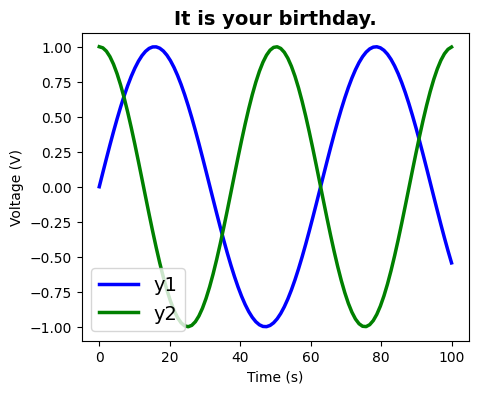

In [36]:
fig, ax = plt.subplots(figsize=(5,4))    # define fig and axes

x = np.linspace(0,100,100)   
y1 = np.sin(x/10)       
y2 = np.cos(x/8)       

ax.plot(x, y1, linewidth=2.5, label='y1') 
ax.plot(x, y2, linewidth=2.5, label='y2') 

ax.lines[0].set_color('b')
ax.lines[1].set_color('g')

#add titles, x labels, y labels, legend
title   = ax.set_title('It is your birthday.', fontsize=14, fontweight='bold')
xlabels = ax.set_xlabel('Time (s)')
ylabels = ax.set_ylabel('Voltage (V)')
legend  = ax.legend(fontsize=14)

In [90]:
def get_title(fig):
    """ 
    title = get_title(fig)
    """
    txt = str(fig.axes)
    pattern = r"title={'center': '(.*?)'}"
    match = re.search(pattern, txt)
    out = match.group(1)
    return out

def get_xlabel(fig):
    """ 
    xlabel = get_xlabel(fig)
    """
    txt = str(fig.axes)
    pattern = r"xlabel='(.*?)'"
    match = re.search(pattern, txt)
    out = match.group(1)
    return out

def get_ylabel(fig):
    """ 
    ylabel = get_ylabel(fig)
    """
    txt = str(fig.axes)
    pattern = r"ylabel='(.*?)'"
    match = re.search(pattern, txt)
    out = match.group(1)
    return out

In [ ]:
def extract_data(fig):
    """ 
    list_line = extract_data(fig)

    Loop over all lines in the figure and 
    pull out all the useful information from the Line2D artist and 
    dump into a dict.
    """
    list_line = []
    for this_line in fig.axes[0].lines:

        label = this_line.get_label()
        color = this_line.get_color()
        draw_style = this_line.get_drawstyle()
        line_style = this_line.get_linestyle()
        line_width = this_line.get_linewidth()
        # data
        aa = np.array(this_line.get_data())
        x = aa[0,:]
        y = aa[1,:]

        list_line.append({'label':label, 
                          'color':color, 
                          'draw_style':draw_style, 
                          'line_style':line_style,
                          'line_width':line_width,
                          'x':x,
                          'y':y})
        
        return list_line
        

In [109]:
for this_line in fig.axes[0].lines:
    print(this_line)

Line2D(y1)
Line2D(y2)


In [134]:
this_line.get_linestyle()

'-'

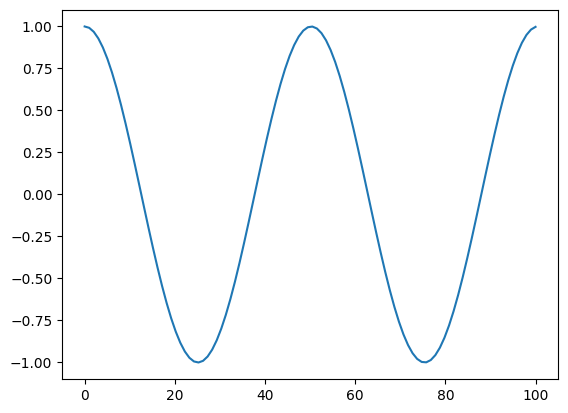

In [124]:
aa = np.array(this_line.get_data())
aa.shape
x = aa[0,:]
y = aa[1,:]
plt.plot(x,y)

## Test functions

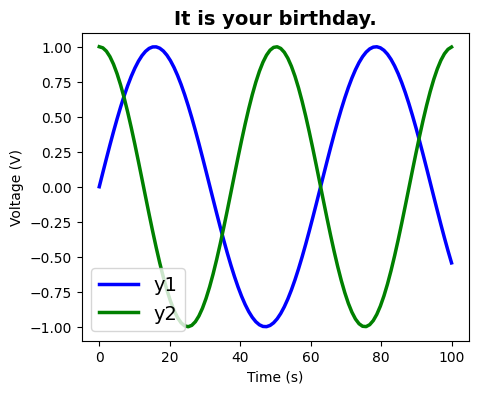

In [67]:
fig, ax = plt.subplots(figsize=(5,4))    # define fig and axes

x = np.linspace(0,100,100)   
y1 = np.sin(x/10)       
y2 = np.cos(x/8)       

ax.plot(x, y1, linewidth=2.5, label='y1') 
ax.plot(x, y2, linewidth=2.5, label='y2') 

ax.lines[0].set_color('b')
ax.lines[1].set_color('g')

#add titles, x labels, y labels, legend
title   = ax.set_title('It is your birthday.', fontsize=14, fontweight='bold')
xlabels = ax.set_xlabel('Time (s)')
ylabels = ax.set_ylabel('Voltage (V)')
legend  = ax.legend(fontsize=14)

In [87]:
def test_get_title():
    title = get_title(fig)
    assert title == 'It is your birthday.', print('get_title caused an error')

def test_get_xlabel():
    xlabel = get_xlabel(fig)
    assert xlabel == 'Time (s)', print('get_xlabel caused an error')

def test_get_ylabel():
    ylabel = get_ylabel(fig)
    assert ylabel == 'Voltage (V)', print('get_ylabel caused an error')

    


In [89]:
test_get_title()
test_get_xlabel()
test_get_ylabel()